In [2]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

#IBMQ.load_account()

In [3]:
def list_backends(provider):
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = "simulated"
        
        print(backend.name(), "has", backend.status().pending_jobs, "qued and", qubit_count, "qubits")
        
def run(backend, circuit):
    job = execute(circuit, backend=backend, shots=1000)
    job_monitor(job)
    return(job)

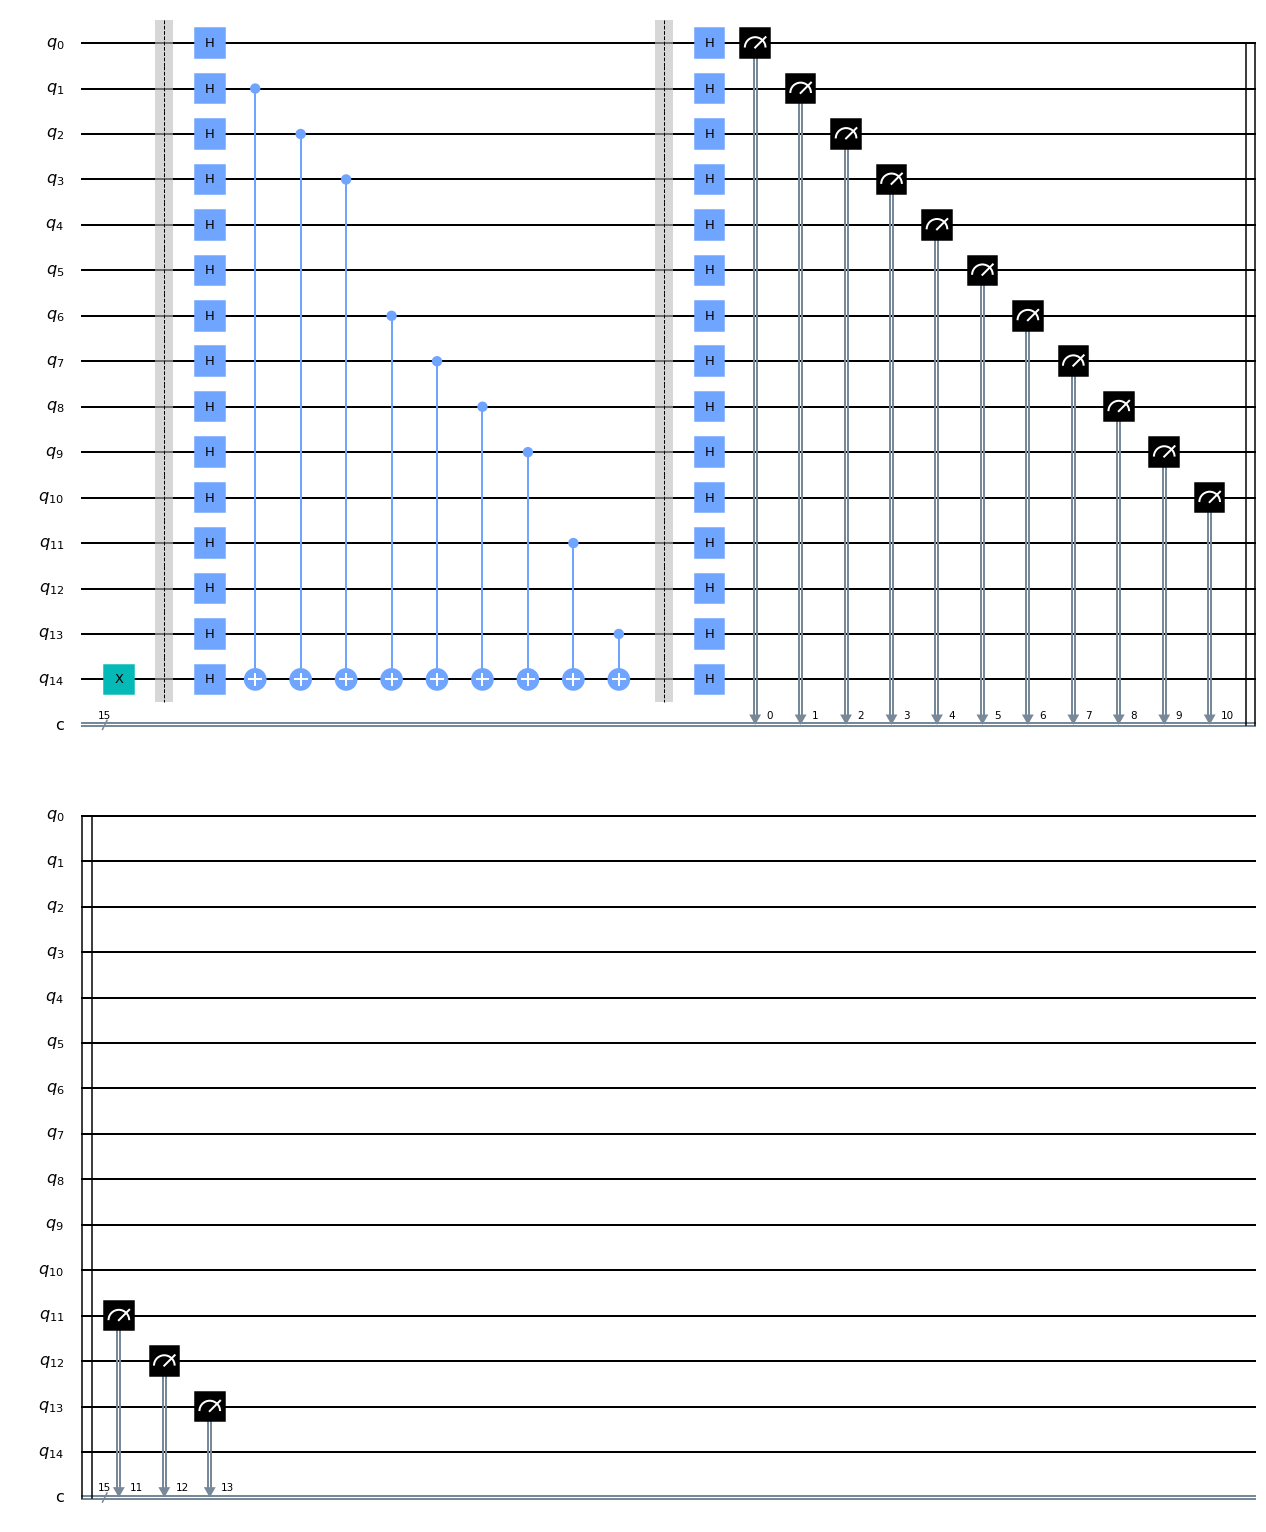

In [35]:
num = [0,1,1,1,0,0,1,1,1,1,0,1,0,1]

l = len(num)

circuit = QuantumCircuit(l+1,l+1)
circuit.x(l)
circuit.barrier()
circuit.h(range(l+1))

for i in range(0,l):
    if num[i] == 1:
        circuit.cx(i, l)
        
circuit.barrier()
circuit.h(range(l+1))
circuit.measure(range(l), range(l))

circuit.draw("mpl")

Job Status: job has successfully run


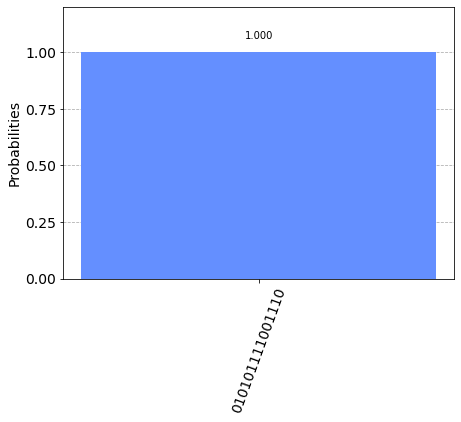

In [36]:
plot_histogram([run(Aer.get_backend("qasm_simulator"), circuit).result().get_counts()]) #run on simulator
#plot_histogram([run(IBMQ.get_provider("ibm-q").get_backend("ibmqx2"), circuit).result().get_counts]) # run on ibmq